## Unsupervised Learning Techniques

>If intelligence was a cake,
unsupervised learning would be the cake, supervised learning would be the icing on
the cake, and reinforcement learning would be the cherry on the cake.<br>
-Yann LeCun 

A few more unsupervised learning tasks and algorithms are:
* Dimensionality reduction
* Clustering
* Anomaly detection
* Anomaly detection

### Clustering

Clustering is the task of identifying similar instances
and assigning them to clusters, i.e., groups of similar instances.<br>
Clustering is used in a wide variety of applications, including:
* **For customer segmentation**
*  **For data analysis:** when analyzing a new dataset, it is often useful to first discover
clusters of similar instances, as it is often easier to analyze clusters separately.
* **As a dimensionality reduction technique:** Once a dataset has been clustered, it is
usually possible to measure each instance’s affinity with each cluster (*affinity is
any measure of how well an instance fits into a cluster*). Each instance’s feature
vector x can then be replaced with the vector of its cluster affinities. If there are k
clusters, then this vector is k dimensional. This is typically much lower dimen‐
sional than the original feature vector, but it can preserve enough information for
further processing.
* **For anomaly detection** (also called outlier detection): any instance that has a low
affinity to all the clusters is likely to be an anomaly.
* **For semi-supervised learning**
* **To segment an image**

>There is no universal definition of what a cluster is: it really depends on the context,
and different algorithms will capture different kinds of clusters. For example, some
algorithms look for instances centered around a particular point, called a centroid.
Others look for continuous regions of densely packed instances: these clusters can
take on any shape. Some algorithms are hierarchical, looking for clusters of clusters.
And the list goes on.

### K-Means

The K-Means algorithm is a simple algorithm capable of clustering this
kind of dataset very quickly and efficiently, often in just a few iterations.

In [7]:
#Creating the blobs dataset
from sklearn.datasets import make_blobs
blobs = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=1.0, random_state=101)
X = blobs[0]
y = blobs[1]

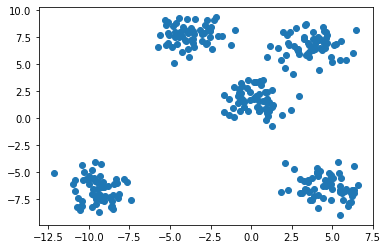

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(blobs[0][:,0], blobs[0][:,1])

`sklearn.cluster.KMeans` is a class that implements the K-Means algorithm.

> Before implementing K-Means, we should first normalize the data. To see the difference, we'll use both the scaled and not scaled data.

#### Not Scaled

In [39]:
from sklearn.cluster import KMeans
clusters = 5
kmeans = KMeans(n_clusters=clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

Using `kmeans.labels_` gives the cluster assignment for each data point.
The same can also be obtained via `kmeans.predict(X)`.

In [20]:
y_pred = kmeans.predict(X)
y_pred.shape, kmeans.labels_.shape
y_pred in kmeans.labels_

True

`kmeans.cluster_centers_` gives the cluster centers.

In [21]:
kmeans.cluster_centers_

array([[ 4.61127911, -6.32093457],
       [-3.74246035,  7.71842698],
       [-9.44831586, -6.60544142],
       [ 3.70782111,  6.74617942],
       [ 0.22511611,  1.68940415]])

Using the cluster centers, we can assign each data point to the closest cluster center.

In [24]:
import numpy as np
X_new = np.array([[0, 2], [8, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 3, 4, 4])

In [27]:
kmeans.inertia_

664.4707453596375

#### Scaled

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [29]:
clusters = 5
kmeans2 = KMeans(n_clusters=clusters, random_state=42)
kmeans2.fit(X_scaled)
y_pred2 = kmeans2.predict(X_scaled)
y_pred2 in kmeans2.labels_

True

In [31]:
X_new = np.array([[0, 2], [8, 2], [-3, 3], [-3, 2.5]])
kmeans2.predict(scaler.transform(X_new))

array([4, 3, 4, 4])

In [32]:
kmeans2.inertia_

20.550262208865124

The K-Means algorithm does not
behave very well when the blobs have very different diameters since all it cares about
when assigning an instance to a cluster is the distance to the centroid.
Instead of assigning each instance to a single cluster, which is called *hard clustering*, it
can be useful to just give each instance a score per cluster: this is called *soft clustering*.

In the KMeans class, the `transform()` method
measures the distance from each instance to every centroid:

In [33]:
kmeans.transform(X_new)

array([[ 9.51324588,  6.83420929, 12.77983938,  6.02280304,  0.3835975 ],
       [ 8.98450785, 13.06084922, 19.45500831,  6.39914203,  7.78108536],
       [12.03376046,  4.77648412, 11.56915219,  7.68301531,  3.4812405 ],
       [11.65077063,  5.27097975, 11.15750155,  7.93882256,  3.32542321]])

In [35]:
kmeans2.transform(scaler.transform(X_new))

array([[1.59316656, 1.15780905, 2.25707339, 1.03444841, 0.06549364],
       [1.47930313, 2.40241946, 3.57645121, 1.11234023, 1.4712913 ],
       [2.07429296, 0.76896133, 1.96368941, 1.40347438, 0.64509681],
       [2.01737663, 0.84785525, 1.90154911, 1.43956115, 0.62363504]])

>If you have a high-dimensional
dataset and you transform it this way, you end up with a k-dimensional dataset: this
can be a very efficient non-linear dimensionality reduction technique.

#### The K-Means Algorithm

You can see the
algorithm in action in the figure. the centroids are initialized randomly (top left),
then the instances are labeled (top right), then the centroids are updated (center left),
the instances are relabeled (center right), and so on. As you can see, in just 3 itera‐
tions the algorithm has reached a clustering that seems close to optimal

<figure>
<figcaption><h4> The K-Means algorithm</h4></figcaption>
<img src = "img/09_01.png">
</figure>

Unfortunately, although the algorithm is guaranteed to converge, it may not converge
to the right solution (i.e., it may converge to a local optimum): this depends on the
centroid initialization. This problem can be solved with some methods.

<figure>
<figcaption><h4>The random initialization</h4></figcaption>
<img src = "img/09_02.png">
</figure>

>The computational complexity of the algorithm is generally linear
with regards to the number of instances m, the number of clusters
k and the number of dimensions n. However, this is only true when
the data has a clustering structure. If it does not, then in the worst
case scenario the complexity can increase exponentially with the
number of instances. In practice, however, this rarely happens, and
K-Means is generally one of the fastest clustering algorithms.

#### Centroid Initialization Methods

If you happen to know approximately where the centroids should be (e.g., if you ran
another clustering algorithm earlier), then you can set the `init` hyperparameter to a
NumPy array containing the list of centroids, and set `n_init` to 1:

In [36]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

Another solution is to run the algorithm multiple times with different random initial‐
izations and keep the best solution. This is controlled by the `n_init` hyperparameter:
by default, it is equal to 10, which means that the whole algorithm described earlier
actually runs 10 times when you call `fit()`, and Scikit-Learn keeps the best solution.

>An important improvement to the K-Means algorithm is called K-Means++. This algorithm uses a
smarter initialization step that tends to select centroids that are distant from one
another, and this makes the K-Means algorithm much less likely to converge to a suboptimal solution.

The `KMeans` class actually uses this initialization method by default. If you want to
force it to use the original method (i.e., picking k instances randomly to define the
initial centroids), then you can set the `init` hyperparameter to "random". 

>

#### Accelerated K-Means and Mini-batch K-Means

Another important improvement to the K-Means algorithm was proposed in a 2003. It considerably accelerates the algorithm by avoiding many
unnecessary distance calculations. This is the algorithm
used by default by the KMeans class (but you can force it to use the original algorithm
by setting the algorithm hyperparameter to "full".

Yet another important variant of the K-Means algorithm was proposed in a 2010. Instead of using the full dataset at each iteration, the algo‐
rithm is capable of using mini-batches, moving the centroids just slightly at each iter‐
ation. This speeds up the algorithm typically by a factor of 3 or 4 and makes it
possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements
this algorithm in the `MiniBatchKMeans` class. 

In [37]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

Although the Mini-batch K-Means algorithm is much faster than the regular KMeans algorithm, its inertia is generally slightly worse, especially as the number of
clusters increases.

<figure>
<figcaption><h4>Mini-batch K-Means vs K-Means</h4></figcaption>
<img src = "img/09_03.png">
</figure>

#### Finding the Optimal Number of Clusters

Finding the optimal number of clusters is not very apparent. The
inertia is not a good performance metric when trying to choose k since it keeps get‐
ting lower as we increase k. Indeed, the more clusters there are, the closer each
instance will be to its closest centroid, and therefore the lower the inertia will be. However, a plot between inertia tensor and the number of cluster gives us a way to find the optimal number of clusters.

<figure>
<figcaption><h4>Selecting the number of clusters k using the “elbow rule”</h4></figcaption>
<img src = "img/09_04.png">
</figure>

As you can see, the inertia drops very quickly as we increase k up to 4, but then it
decreases much more slowly as we keep increasing k. This curve has roughly the
shape of an arm, and there is an “elbow” at k=4 so if we did not know better, it would
be a good choice.

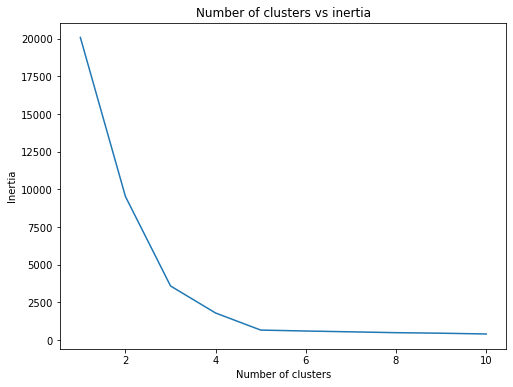

In [59]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Number of clusters vs inertia");

Here, we can easily see that k=5 is the knee point.

A more precise approach (but also more computationally expensive) is to use the `silhouette` score, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to $(b – a) / max(a, b)$ where a is the mean distance
to the other instances in the same cluster (it is the mean intra-cluster distance), and b
is the mean nearest-cluster distance, that is the mean distance to the instances of the
next closest cluster (defined as the one that minimizes b, excluding the instance’s own
cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to
+1 means that the instance is well inside its own cluster and far from other clusters,
while a coefficient close to 0 means that it is close to a cluster boundary, and finally a
coefficient close to -1 means that the instance may have been assigned to the wrong
cluster. To compute the silhouette score, you can use Scikit-Learn’s `silhouette_score()` function, giving it all the instances in the dataset, and the labels they
were assigned:

In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.7485313091025142

Let's plot the silhouette_score with number of clusters/

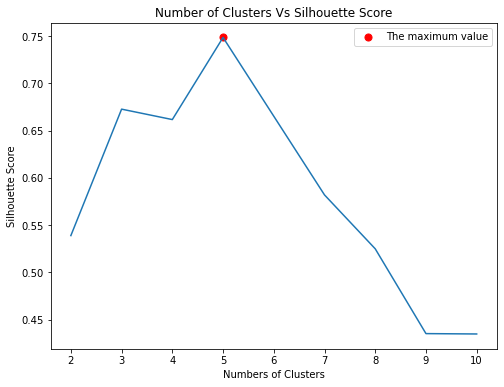

In [57]:
sil_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    sil_score.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(8,6))
plt.plot(range(2, 11), sil_score)
plt.scatter(np.argmax(sil_score)+2, max(sil_score), color = 'red', s=50, label="The maximum value")
plt.xlabel("Numbers of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters Vs Silhouette Score")
plt.legend();

This gives much more definite answer about the numbers of cluster. As can be seen, k=5 gives the maximum score, so, numbers of clusters should be 5.

An even more informative visualization is obtained when you plot every instance’s
silhouette coefficient, sorted by the cluster they are assigned to and by the value of the
coefficient. This is called a silhouette diagram.

<figure>
<figcaption><h4>Silouhette analysis: comparing the silhouette diagrams for various values of
k</h4></figcaption>
<img src = "img/09_05.png">
</figure>

>If many of the instances stop short of the dashed line, ending to the left of it), then the
cluster is rather bad since this means its instances are much too close to other clusters.

#### Limits of K-Means

It is necessary to run the algorithm several times to avoid sub-optimal sol‐
utions, plus you need to specify the number of clusters, which can be quite a hassle.
Moreover, K-Means does not behave very well when the clusters have varying sizes,
different densities, or non-spherical shapes. For example, Figure shows how KMeans clusters a dataset containing three ellipsoidal clusters of different dimensions,
densities and orientations:

<figure>
<figcaption><h4>K-Means fails to cluster these ellipsoidal blobs properly</h4></figcaption>
<img src = "img/09_06.png">
</figure>

>It is important to scale the input features before you run K-Means,
or else the clusters may be very stretched, and K-Means will per‐
form poorly. Scaling the features does not guarantee that all the
clusters will be nice and spherical, but it generally improves things.

Depending on the data, different clustering algorithms may perform better. For exam‐
ple, on these types of elliptical clusters, Gaussian mixture models work great.

### Some Examples of Uses of Clustering Algorithms

#### Using clustering for image segmentation

Image segmentation is the task of partitioning an image into multiple segments. In
semantic segmentation, all pixels that are part of the same object type get assigned to
the same segment. For example, in a self-driving car’s vision system, all pixels that are
part of a pedestrian’s image might be assigned to the “pedestrian” segment

In [66]:
from matplotlib.image import imread
image = imread("img/flowers.jpg")
image.shape

(5568, 3616, 3)

In [79]:
from PIL import Image
img = Image.open("img/flowers.jpg")
img_resized = img.resize((1000, np.int(1000*5568/3616)), Image.ANTIALIAS)

In [81]:
img_resized.save('img/flowers_low.jpg')

In [82]:
image = imread("img/flowers_low.jpg")
image.shape

(1539, 1000, 3)

The following code reshapes the array to get a
long list of RGB colors, then it clusters these colors using `K-Means`. For example, it
may identify a color cluster for all shades of green. Next, for each color (e.g., dark
green), it looks for the mean color of the pixel’s color cluster. For example, all shades
of green may be replaced with the same light green color (assuming the mean color of
the green cluster is light green). Finally it reshapes this long list of colors to get the
same shape as the original image. 

In [92]:
def image_knn(n):
    X = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    return segmented_img


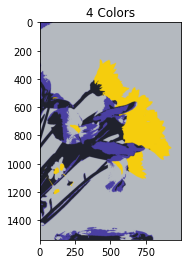

In [95]:
plt.imshow(image_knn(4).astype('uint8'))
plt.title("4 Colors");

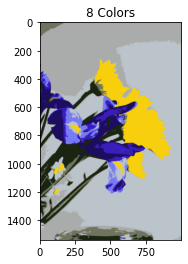

In [96]:
plt.imshow(image_knn(8).astype('uint8'))
plt.title("8 Colors");

Text(0.5, 1.0, '12 Colors')

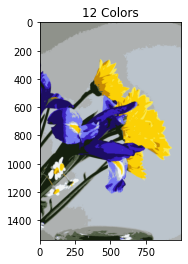

In [97]:
plt.imshow(image_knn(12).astype('uint8'))
plt.title("12 Colors")

Text(0.5, 1.0, '16 Colors')

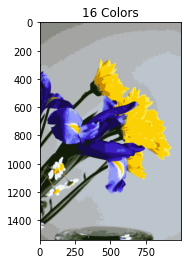

In [98]:
plt.imshow(image_knn(16).astype('uint8'))
plt.title("16 Colors")

#### Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a
preprocessing step before a supervised learning algorithm. 

In [102]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [101]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9644444444444444

It seems that the logistic regressor, by itself is 96% accurate. Let's see if we can increase the score.

We will create a pipeline that will first cluster the
training set into 50 clusters and replace the images with their distances to these 50
clusters, then apply a logistic regression model.

>Although it seems reasonable to define the number of clusters to 10,
since there are 10 different digits, it is unlikely to perform well,
because there are several different ways to write each digit.

In [116]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=50)),
("log_reg", LogisticRegression(max_iter=10000)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [105]:
pipeline.score(X_test, y_test)

0.9733333333333334

Okay, we are getting a boost of 1%! ):

But we chose the number of clusters k completely arbitrarily, we can surely do better.
Since K-Means is just a preprocessing step in a classification pipeline, finding a good
value for k is much simpler than earlier: there’s no need to perform silhouette analysis
or minimize the inertia, the best value of k is simply the one that results in the best
classification performance during cross-validation. Let’s use `GridSearchCV` to find the
optimal number of clusters.

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(40, 100,2))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=6)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done  90 out of  90 | elapsed:  4.0min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=6, param_grid={'kmeans__n_clusters': range(40, 100, 2)},
             verbose=2)

In [124]:
grid_clf.best_estimator_

Pipeline(steps=[('kmeans', KMeans(n_clusters=84)),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [128]:
grid_clf.score(X_test, y_test)

0.9777777777777777

Hmm! 0.4% of boost! Not much but still.

#### Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty
of unlabeled instances and very few labeled instances. Let’s train a logistic regression
model on a sample of 50 labeled instances from the digits dataset

In [131]:
n_labeled = 50
log_reg = LogisticRegression( max_iter =1000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=1000)

Seeing the fact that the above model is trained just on 50 instances, the score is pretty good.
<br>
Let’s see how we can do
better. First, let’s cluster the training set into 50 clusters, then for each cluster let’s find
the image closest to the centroid. We will call these images the representative images:

In [133]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Next step would be to label each of them.

In [143]:
representative_digit_idx = y_train[representative_digit_idx]

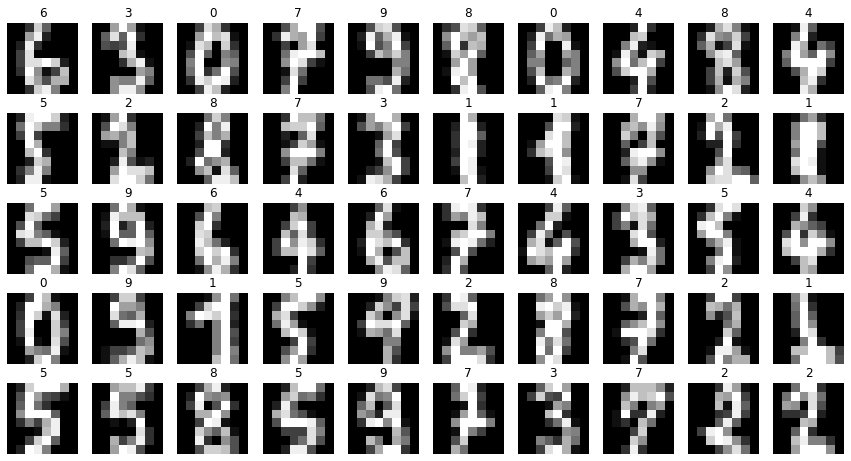

In [194]:
X_images = X_representative_digits.reshape(5,10,64)
X_label = representative_digit_idx.reshape(5,10)

fig, axes = plt.subplots(5, 10, figsize = (15,8))
for i in range(5):
    for j in range(10):
        axes[i][j].imshow(X_images[i][j].reshape((8,8)), cmap='gray')
        axes[i][j].set_title(X_label[i][j])
        axes[i][j].axis("off");

Now we have a dataset with just 50 labeled instances, but instead of being completely
random instances, each of them is a representative image of its cluster. Let’s see if the
performance is any better:

In [198]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits, representative_digit_idx)
log_reg.score(X_test, y_test)

0.9244444444444444

Great! Accuracy incresed to 92.4%, although we are still only training
the model on 50 instances. Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances.
<br>But perhaps we can go one step further: what if we propagated the labels to all the
other instances in the same cluster? This is called label propagation:

In [199]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = representative_digit_idx[i]

In [201]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.94

Hurray! An accuracy 0f 94%. We can still do better. The
problem is that we propagated each representative instance’s label to all the instances
in the same cluster, including the instances located close to the cluster boundaries,
which are more likely to be mislabeled. Let’s see what happens if we only propagate
the labels to the 20% of the instances that are closest to the centroids:

In [205]:
percentile_closest = 40
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [206]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9288888888888889

Oops! It did worse! Still, with just 50 labeled instances (only 5 examples per class on average!), we got
94% performance, which is pretty close to the performance of logistic regression on
the fully labeled digits dataset (which was 96.4%). This is because the propagated
labels are actually pretty good, their accuracy is very close to 98.5%:

In [207]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9854014598540146

>#### Active Learning